<a href="https://colab.research.google.com/github/madhuvanthi11/ML-Lab-Activity/blob/main/ML_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import tree

In [6]:
data=pd.read_csv('data.csv')

In [7]:
print(data.shape)
data.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [14]:
# Exclude 'id', 'diagnosis', and 'Unnamed: 32' columns
x = data.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1).values
y = data['diagnosis'].values

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=41)

In [16]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [20]:
model=RandomForestClassifier(n_estimators=10,criterion='entropy', random_state=0)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [24]:
print('Random Forest Classifier')
conf_mat=metrics.confusion_matrix(y_test, y_pred)
print('\n Confusion Matrix : \n', conf_mat)
Accuracy_score=accuracy_score(y_test,y_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ',
int (Accuracy_score*100),'%')
print('\n',classification_report(y_pred,y_test))

Random Forest Classifier

 Confusion Matrix : 
 [[108   2]
 [  0  61]]
Accuracy Score :  0.9883040935672515
Accuracy in Percentage :  98 %

               precision    recall  f1-score   support

           B       0.98      1.00      0.99       108
           M       1.00      0.97      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



[Text(0.5, 1.0, 'Random Forest Classifier')]

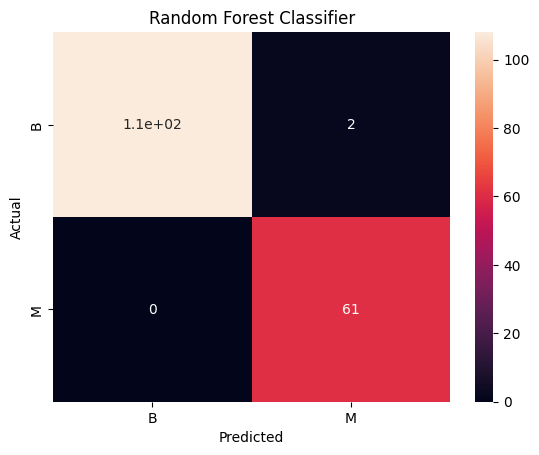

In [26]:
conf_mat=pd.crosstab(y_test,y_pred, rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title='Random Forest Classifier')

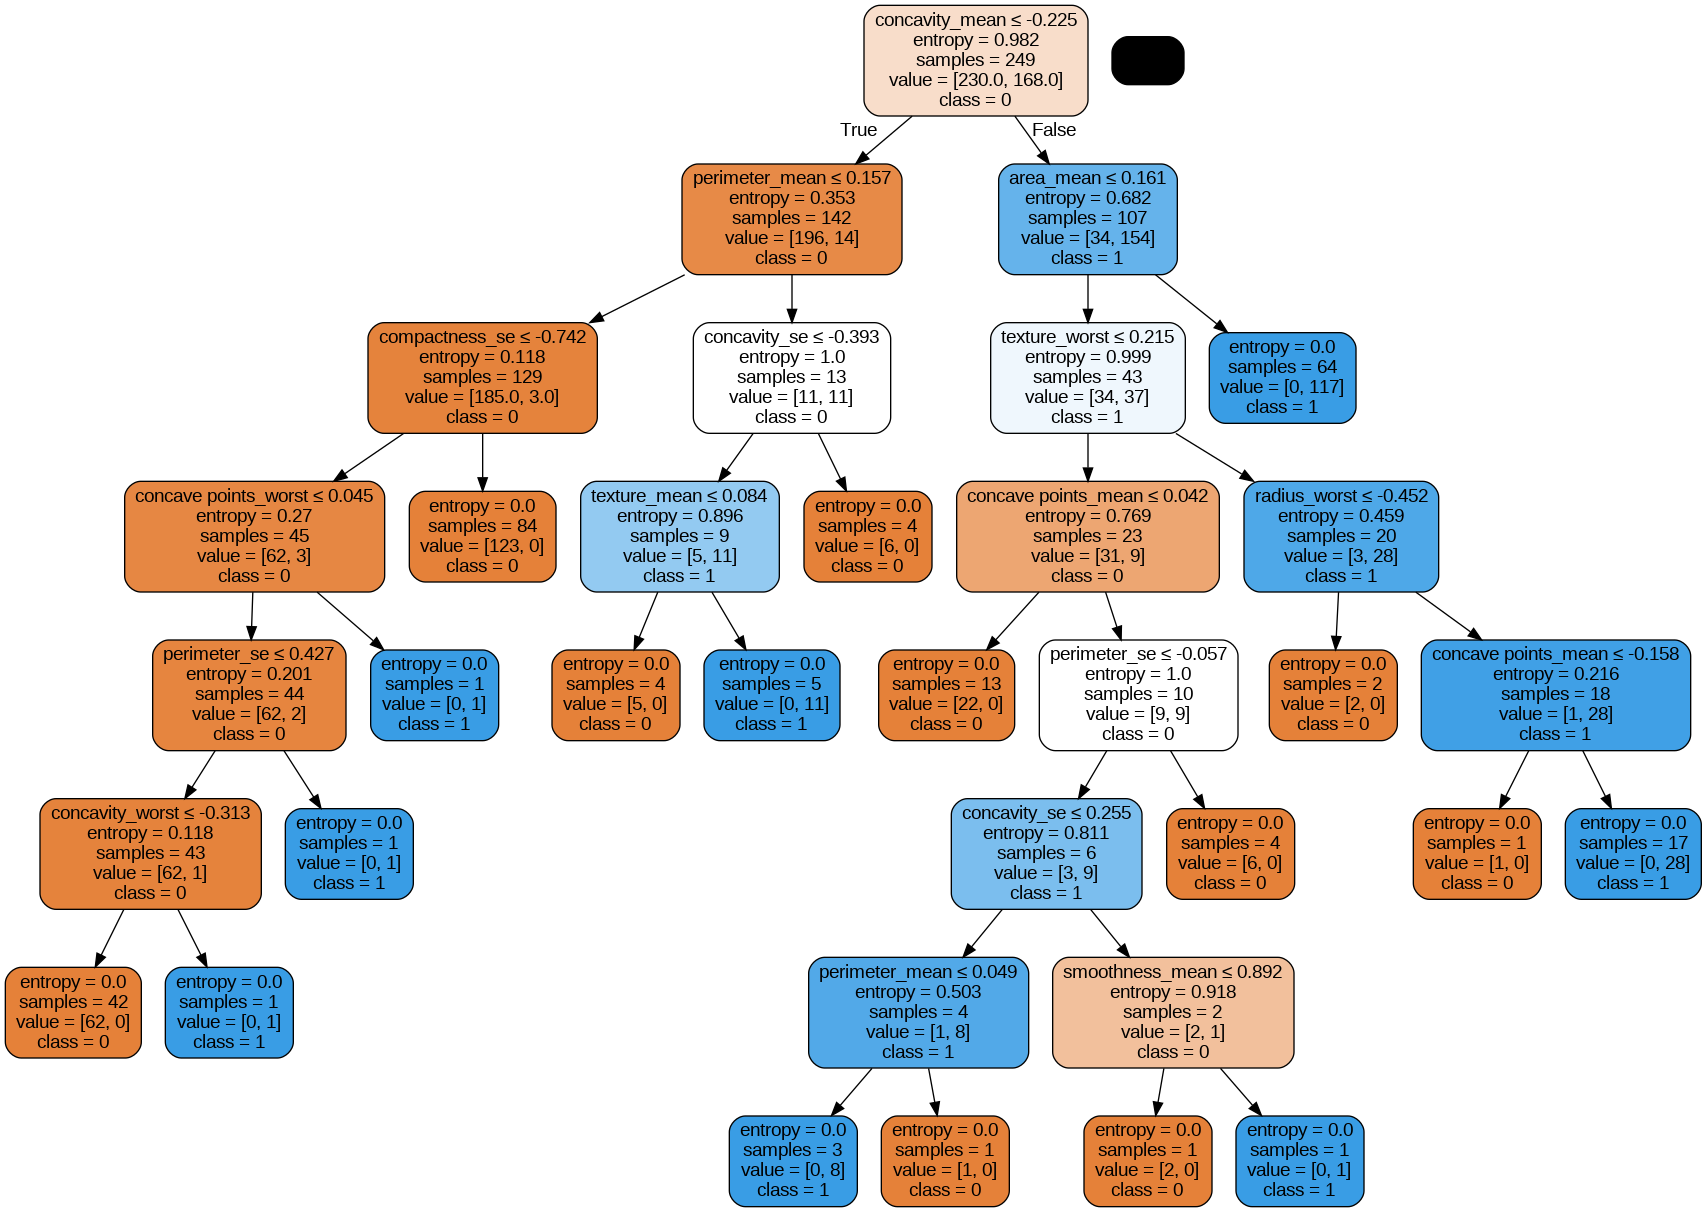

In [32]:
import pydotplus
from IPython.display import Image
# Create DOT data
dot_data = tree.export_graphviz(
    model.estimators_[0],
    out_file=None,
    feature_names=data.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1).columns,
    class_names=['0', '1'],
    filled=True,
    rounded=True,
    special_characters=True
)
#Create graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)
# Generate image
Image(graph.create_png())